In [1]:
import polars as pl
import pandas as pd
import numpy as np

In [2]:
matches=pl.read_csv("each_match_records.csv")
matches

season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
i64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str
2023,"""31-03-2023""",1,"""Group""","""Narendra Modi …","""Ahmedabad""","""Chennai Super …","""Gujarat Titans…","""Gujarat Titans…","""field""","""Nitin Menon""","""HAS Khalid""","""A Bengeri""","""J Srinath""","""Gujarat Titans…",null,5,"""Rashid Khan"""
2023,"""01-04-2023""",2,"""Group""","""Punjab Cricket…","""Chandigarh""","""Punjab Kings""","""Kolkata Knight…","""Kolkata Knight…","""field""","""BNJ Oxenford""","""YC Barde""","""PM Joshi""","""M Nayyar""","""Punjab Kings""",7,null,"""Arshdeep Singh…"
2023,"""01-04-2023""",3,"""Group""","""Bharat Ratna S…","""Lucknow""","""Lucknow Super …","""Delhi Capitals…","""Delhi Capitals…","""field""","""AK Chaudhary""","""NA Patwardhan""","""M Kuppuraj""","""DS Manohar""","""Lucknow Super …",50,null,"""MA Wood"""
2023,"""02-04-2023""",4,"""Group""","""Rajiv Gandhi I…","""Hyderabad""","""Rajasthan Roya…","""Sunrisers Hyde…","""Sunrisers Hyde…","""field""","""KN Ananthapadm…","""R Pandit""","""Abhijit Bhatta…","""V Narayan Kutt…","""Rajasthan Roya…",72,null,"""JC Buttler"""
2023,"""02-04-2023""",5,"""Group""","""M Chinnaswamy …","""Bengaluru""","""Mumbai Indians…","""Royal Challeng…","""Royal Challeng…","""field""","""Nitin Menon""","""Tapan Sharma""","""A Bengeri""","""J Srinath""","""Royal Challeng…",null,8,"""F du Plessis"""
2023,"""03-04-2023""",6,"""Group""","""MA Chidambaram…","""Chennai""","""Chennai Super …","""Lucknow Super …","""Lucknow Super …","""field""","""A Totre""","""BNJ Oxenford""","""PM Joshi""","""M Nayyar""","""Chennai Super …",12,null,"""MM Ali"""
2023,"""04-04-2023""",7,"""Group""","""Arun Jaitley S…","""Delhi""","""Delhi Capitals…","""Gujarat Titans…","""Gujarat Titans…","""field""","""A Nand Kishore…","""GR Sadashiv Iy…","""M Kuppuraj""","""DS Manohar""","""Gujarat Titans…",null,6,"""B Sai Sudharsa…"
2023,"""05-04-2023""",8,"""Group""","""Barsapara Cric…","""Guwahati""","""Punjab Kings""","""Rajasthan Roya…","""Rajasthan Roya…","""field""","""KN Ananthapadm…","""MV Saidharshan…","""Abhijit Bhatta…","""V Narayan Kutt…","""Punjab Kings""",5,null,"""NT Ellis"""
2023,"""06-04-2023""",9,"""Group""","""Eden Gardens""","""Kolkata""","""Kolkata Knight…","""Royal Challeng…","""Royal Challeng…","""field""","""Vinod Seshan""","""VK Sharma""","""A Bengeri""","""Shakti Singh""","""Kolkata Knight…",81,null,"""SN Thakur"""


In [3]:
matches=matches.drop("season","date","match_type","venue","team1","team2","umpire1","umpire2","reserve_umpire","match_referee","winner","winner_runs","winner_wickets","man_of_match").with_columns(pl.col("location").alias("city"),(pl.col("match_number")).alias("match_id")).drop("match_number","location")
matches

toss_won,toss_decision,city,match_id
str,str,str,i64
"""Gujarat Titans…","""field""","""Ahmedabad""",1
"""Kolkata Knight…","""field""","""Chandigarh""",2
"""Delhi Capitals…","""field""","""Lucknow""",3
"""Sunrisers Hyde…","""field""","""Hyderabad""",4
"""Royal Challeng…","""field""","""Bengaluru""",5
"""Lucknow Super …","""field""","""Chennai""",6
"""Gujarat Titans…","""field""","""Delhi""",7
"""Rajasthan Roya…","""field""","""Guwahati""",8
"""Royal Challeng…","""field""","""Kolkata""",9


In [4]:
deliveries =pl.read_csv("/workspace/Ravikumar/csv_files/IPL_ball_by_ball_updated.csv")
deliveries

match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
i64,i64,str,str,i64,f64,str,str,str,str,str,i64,i64,i64,str,i64,i64,str,str,str,str,str
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.1,"""Kolkata Knight…","""Royal Challeng…","""SC Ganguly""","""BB McCullum""","""P Kumar""",0,1,null,null,null,1,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.2,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,0,null,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.3,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,1,1,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.4,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,0,null,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.5,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,0,null,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.6,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,0,null,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,0.7,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""P Kumar""",0,1,null,null,null,1,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,1.1,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""Z Khan""",0,0,null,null,null,null,null,null,null,null,null
335982,2008,"""18-04-2008""","""M Chinnaswamy …",1,1.2,"""Kolkata Knight…","""Royal Challeng…","""BB McCullum""","""SC Ganguly""","""Z Khan""",4,0,null,null,null,null,null,null,null,null,null


In [5]:
deliveries=deliveries.filter(pl.col("season")==2023).drop("season","venue",'start_date',"striker","non_striker","bowler","wides","noballs","byes","legbyes",'penalty','wicket_type','other_wicket_type','other_player_dismissed')
deliveries

match_id,innings,ball,batting_team,bowling_team,runs_off_bat,extras,player_dismissed
i64,i64,f64,str,str,i64,i64,str
1359475,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,null
1359475,1,0.2,"""Chennai Super …","""Gujarat Titans…",0,1,null
1359475,1,0.3,"""Chennai Super …","""Gujarat Titans…",0,0,null
1359475,1,0.4,"""Chennai Super …","""Gujarat Titans…",1,0,null
1359475,1,0.5,"""Chennai Super …","""Gujarat Titans…",0,0,null
1359475,1,0.6,"""Chennai Super …","""Gujarat Titans…",0,0,null
1359475,1,1.1,"""Chennai Super …","""Gujarat Titans…",4,0,null
1359475,1,1.2,"""Chennai Super …","""Gujarat Titans…",0,0,null
1359475,1,1.3,"""Chennai Super …","""Gujarat Titans…",4,0,null


In [6]:
deliveries=deliveries.with_columns((pl.col("runs_off_bat")+pl.col("extras")).alias("runs")).drop("runs_off_bat", "extras").with_columns(pl.col("player_dismissed").apply(lambda x:0 if x is None else 1)).fill_null(0)
deliveries

match_id,innings,ball,batting_team,bowling_team,player_dismissed,runs
i64,i64,f64,str,str,i64,i64
1359475,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,0.2,"""Chennai Super …","""Gujarat Titans…",0,1
1359475,1,0.3,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,0.4,"""Chennai Super …","""Gujarat Titans…",0,1
1359475,1,0.5,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,0.6,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,1.1,"""Chennai Super …","""Gujarat Titans…",0,4
1359475,1,1.2,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,1.3,"""Chennai Super …","""Gujarat Titans…",0,4


In [7]:
final_score_data=deliveries.groupby(["match_id", "innings"]).agg(pl.col("runs").sum().alias("final_runs")).sort("match_id")
final_score_data

match_id,innings,final_runs
i64,i64,i64
1359475,1,178
1359475,2,182
1359476,2,146
1359476,1,191
1359477,2,143
1359477,1,193
1359478,1,203
1359478,2,131
1359479,1,171


In [8]:
deliveries=deliveries.with_columns(pl.col("runs").cumsum().over(deliveries["match_id"],deliveries["innings"]).alias("current_runs")).drop("runs").fill_null(0)
deliveries=deliveries.with_columns(pl.col("player_dismissed").cumsum().over(deliveries["match_id"],deliveries["innings"]).alias("wickets")).drop("player_dismissed")
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets
i64,i64,f64,str,str,i64,i64
1359475,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0
1359475,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0
1359475,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0
1359475,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0
1359475,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0
1359475,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0
1359475,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0
1359475,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0
1359475,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0


In [9]:
deliveries=deliveries.join(final_score_data,on=['match_id','innings'])
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs
i64,i64,f64,str,str,i64,i64,i64
1359475,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178
1359475,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178
1359475,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178
1359475,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178
1359475,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178
1359475,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178
1359475,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178
1359475,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178
1359475,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178


In [10]:
deliveries=deliveries.with_columns((pl.col("match_id")-1359474).alias("match_id"))
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs
i64,i64,f64,str,str,i64,i64,i64
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178


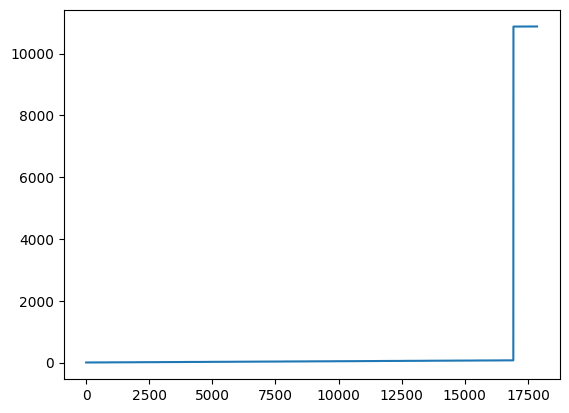

In [11]:
import matplotlib.pyplot as mp
mp.plot(deliveries["match_id"])

In [12]:
deliveries=deliveries.with_columns(pl.when(pl.col("match_id")>1000).then(pl.col("match_id")-10805).otherwise(pl.col("match_id")))
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs
i64,i64,f64,str,str,i64,i64,i64
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178


In [13]:
deliveries=deliveries.join(matches,on="match_id")
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city
i64,i64,f64,str,str,i64,i64,i64,str,str,str
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178,"""Gujarat Titans…","""field""","""Ahmedabad"""


In [14]:
deliveries=deliveries.with_columns(pl.col("toss_decision").str.replace("field",1)).with_columns(pl.col("toss_decision").str.replace("bat",0))
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city
i64,i64,f64,str,str,i64,i64,i64,str,str,str
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178,"""Gujarat Titans…","""1""","""Ahmedabad"""


In [15]:
deliveries=deliveries.with_columns(deliveries["toss_decision"].cast(pl.Int64()))
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city
i64,i64,f64,str,str,i64,i64,i64,str,i64,str
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178,"""Gujarat Titans…",1,"""Ahmedabad"""


In [16]:
deliveries=deliveries.with_columns((pl.col("current_runs")/pl.col("ball").cast(int)).alias("current_run_rate"))
deliveries=deliveries.filter(pl.col("city")!=None)
deliveries

match_id,innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city,current_run_rate
i64,i64,f64,str,str,i64,i64,i64,str,i64,str,f64
1,1,0.1,"""Chennai Super …","""Gujarat Titans…",0,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",NaN
1,1,0.2,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",inf
1,1,0.3,"""Chennai Super …","""Gujarat Titans…",1,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",inf
1,1,0.4,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",inf
1,1,0.5,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",inf
1,1,0.6,"""Chennai Super …","""Gujarat Titans…",2,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",inf
1,1,1.1,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",6.0
1,1,1.2,"""Chennai Super …","""Gujarat Titans…",6,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",6.0
1,1,1.3,"""Chennai Super …","""Gujarat Titans…",10,0,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.0


In [17]:
import seaborn as sns

In [18]:
deliveries=deliveries.filter(pl.col("ball")>=6).drop("match_id")
deliveries

innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city,current_run_rate
i64,f64,str,str,i64,i64,i64,str,i64,str,f64
1,6.1,"""Chennai Super …","""Gujarat Titans…",51,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",8.5
1,6.2,"""Chennai Super …","""Gujarat Titans…",52,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",8.666667
1,6.3,"""Chennai Super …","""Gujarat Titans…",58,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.666667
1,6.4,"""Chennai Super …","""Gujarat Titans…",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,6.5,"""Chennai Super …","""Gujarat Titans…",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,6.6,"""Chennai Super …","""Gujarat Titans…",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,7.1,"""Chennai Super …","""Gujarat Titans…",65,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.285714
1,7.2,"""Chennai Super …","""Gujarat Titans…",66,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.428571
1,7.3,"""Chennai Super …","""Gujarat Titans…",70,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.0


In [19]:
deliveries["batting_team"].unique()

batting_team
str
"""Chennai Super …"
"""Sunrisers Hyde…"
"""Delhi Capitals…"
"""Rajasthan Roya…"
"""Mumbai Indians…"
"""Kolkata Knight…"
"""Punjab Kings"""
"""Gujarat Titans…"
"""Lucknow Super …"


In [20]:
deliveries=deliveries.with_columns(pl.col("batting_team").str.replace("Gujarat Titans","Gujarat Lions"))
deliveries=deliveries.with_columns(pl.col("bowling_team").str.replace("Gujarat Titans","Gujarat Lions"))

deliveries=deliveries.with_columns(pl.col("batting_team").str.replace("Punjab Kings","Kings XI Punjab"))
deliveries=deliveries.with_columns(pl.col("bowling_team").str.replace("Punjab Kings","Kings XI Punjab"))

deliveries=deliveries.filter((deliveries["batting_team"]!="Lucknow Super Giants") & (deliveries["bowling_team"]!="Lucknow Super Giants") )
deliveries

innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_won,toss_decision,city,current_run_rate
i64,f64,str,str,i64,i64,i64,str,i64,str,f64
1,6.1,"""Chennai Super …","""Gujarat Lions""",51,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",8.5
1,6.2,"""Chennai Super …","""Gujarat Lions""",52,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",8.666667
1,6.3,"""Chennai Super …","""Gujarat Lions""",58,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.666667
1,6.4,"""Chennai Super …","""Gujarat Lions""",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,6.5,"""Chennai Super …","""Gujarat Lions""",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,6.6,"""Chennai Super …","""Gujarat Lions""",64,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.666667
1,7.1,"""Chennai Super …","""Gujarat Lions""",65,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.285714
1,7.2,"""Chennai Super …","""Gujarat Lions""",66,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",9.428571
1,7.3,"""Chennai Super …","""Gujarat Lions""",70,2,178,"""Gujarat Titans…",1,"""Ahmedabad""",10.0


In [21]:
deliveries=deliveries.with_columns(pl.col("toss_won").alias("toss_winner")).drop("toss_won")
deliveries=deliveries.with_columns(pl.col("innings").alias("inning")).drop("inning")
deliveries

innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_decision,city,current_run_rate,toss_winner
i64,f64,str,str,i64,i64,i64,i64,str,f64,str
1,6.1,"""Chennai Super …","""Gujarat Lions""",51,2,178,1,"""Ahmedabad""",8.5,"""Gujarat Titans…"
1,6.2,"""Chennai Super …","""Gujarat Lions""",52,2,178,1,"""Ahmedabad""",8.666667,"""Gujarat Titans…"
1,6.3,"""Chennai Super …","""Gujarat Lions""",58,2,178,1,"""Ahmedabad""",9.666667,"""Gujarat Titans…"
1,6.4,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Titans…"
1,6.5,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Titans…"
1,6.6,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Titans…"
1,7.1,"""Chennai Super …","""Gujarat Lions""",65,2,178,1,"""Ahmedabad""",9.285714,"""Gujarat Titans…"
1,7.2,"""Chennai Super …","""Gujarat Lions""",66,2,178,1,"""Ahmedabad""",9.428571,"""Gujarat Titans…"
1,7.3,"""Chennai Super …","""Gujarat Lions""",70,2,178,1,"""Ahmedabad""",10.0,"""Gujarat Titans…"


In [22]:
deliveries["toss_winner"].unique()

toss_winner
str
"""Mumbai Indians…"
"""Sunrisers Hyde…"
"""Royal Challeng…"
"""Gujarat Titans…"
"""Chennai Super …"
"""Rajasthan Roya…"
"""Delhi Capitals…"
"""Punjab Kings"""
"""Kolkata Knight…"


In [23]:
deliveries=deliveries.with_columns(pl.col("toss_winner").str.replace("Titans","Lions"))
deliveries=deliveries.with_columns(pl.col("toss_winner").str.replace("Punjab Kings","Kings XI Punjab"))
deliveries=deliveries.with_columns(pl.col("city").str.replace("Wankhede","Mumbai"))
deliveries=deliveries.with_columns(pl.col("city").str.replace("Bengaluru","Bangalore"))
deliveries=deliveries.with_columns(pl.col("city").str.replace("Eden Gardens","Kolkata"))
deliveries

innings,ball,batting_team,bowling_team,current_runs,wickets,final_runs,toss_decision,city,current_run_rate,toss_winner
i64,f64,str,str,i64,i64,i64,i64,str,f64,str
1,6.1,"""Chennai Super …","""Gujarat Lions""",51,2,178,1,"""Ahmedabad""",8.5,"""Gujarat Lions"""
1,6.2,"""Chennai Super …","""Gujarat Lions""",52,2,178,1,"""Ahmedabad""",8.666667,"""Gujarat Lions"""
1,6.3,"""Chennai Super …","""Gujarat Lions""",58,2,178,1,"""Ahmedabad""",9.666667,"""Gujarat Lions"""
1,6.4,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions"""
1,6.5,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions"""
1,6.6,"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions"""
1,7.1,"""Chennai Super …","""Gujarat Lions""",65,2,178,1,"""Ahmedabad""",9.285714,"""Gujarat Lions"""
1,7.2,"""Chennai Super …","""Gujarat Lions""",66,2,178,1,"""Ahmedabad""",9.428571,"""Gujarat Lions"""
1,7.3,"""Chennai Super …","""Gujarat Lions""",70,2,178,1,"""Ahmedabad""",10.0,"""Gujarat Lions"""


In [24]:
deliveries=deliveries.with_columns((pl.col("innings")).alias("inning"),(pl.col("ball")).alias("balls")).drop("innings","ball").filter(pl.col("city")!="Guwahati")
deliveries 

batting_team,bowling_team,current_runs,wickets,final_runs,toss_decision,city,current_run_rate,toss_winner,inning,balls
str,str,i64,i64,i64,i64,str,f64,str,i64,f64
"""Chennai Super …","""Gujarat Lions""",51,2,178,1,"""Ahmedabad""",8.5,"""Gujarat Lions""",1,6.1
"""Chennai Super …","""Gujarat Lions""",52,2,178,1,"""Ahmedabad""",8.666667,"""Gujarat Lions""",1,6.2
"""Chennai Super …","""Gujarat Lions""",58,2,178,1,"""Ahmedabad""",9.666667,"""Gujarat Lions""",1,6.3
"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions""",1,6.4
"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions""",1,6.5
"""Chennai Super …","""Gujarat Lions""",64,2,178,1,"""Ahmedabad""",10.666667,"""Gujarat Lions""",1,6.6
"""Chennai Super …","""Gujarat Lions""",65,2,178,1,"""Ahmedabad""",9.285714,"""Gujarat Lions""",1,7.1
"""Chennai Super …","""Gujarat Lions""",66,2,178,1,"""Ahmedabad""",9.428571,"""Gujarat Lions""",1,7.2
"""Chennai Super …","""Gujarat Lions""",70,2,178,1,"""Ahmedabad""",10.0,"""Gujarat Lions""",1,7.3


In [25]:
deliveries["city"].unique().to_list()

['Hyderabad',
 'Ahmedabad',
 'Delhi',
 'Mumbai',
 'Kolkata',
 'Bangalore',
 'Chennai',
 'Dharamsala',
 'Chandigarh',
 'Jaipur']

In [26]:
deliveries=deliveries.to_dummies(["batting_team","bowling_team","city","toss_winner"])
deliveries

batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,current_runs,wickets,final_runs,toss_decision,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Dharamsala,city_Hyderabad,city_Jaipur,city_Kolkata,city_Mumbai,current_run_rate,toss_winner_Chennai Super Kings,toss_winner_Delhi Capitals,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,inning,balls
u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,f64
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51,2,178,1,1,0,0,0,0,0,0,0,0,0,8.5,0,0,1,0,0,0,0,0,0,1,6.1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,52,2,178,1,1,0,0,0,0,0,0,0,0,0,8.666667,0,0,1,0,0,0,0,0,0,1,6.2
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,58,2,178,1,1,0,0,0,0,0,0,0,0,0,9.666667,0,0,1,0,0,0,0,0,0,1,6.3
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.4
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.5
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.6
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,65,2,178,1,1,0,0,0,0,0,0,0,0,0,9.285714,0,0,1,0,0,0,0,0,0,1,7.1
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,66,2,178,1,1,0,0,0,0,0,0,0,0,0,9.428571,0,0,1,0,0,0,0,0,0,1,7.2
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,70,2,178,1,1,0,0,0,0,0,0,0,0,0,10.0,0,0,1,0,0,0,0,0,0,1,7.3


In [27]:
deliveries=deliveries.with_columns((pl.Series(name="batting_team_Pune Warriors", values=np.zeros(shape=(1)))),
                        (pl.Series(name="bowling_team_Pune Warriors", values=np.zeros(shape=(1)))),
                        (pl.Series(name="city_Mohali", values=np.zeros(shape=(1)))),
                        (pl.Series(name="city_Pune", values=np.zeros(shape=(1)))),
                        (pl.Series(name="toss_winner_Pune Warriors", values=np.zeros(shape=(1))))
)
deliveries

batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,current_runs,wickets,final_runs,toss_decision,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Dharamsala,city_Hyderabad,city_Jaipur,city_Kolkata,city_Mumbai,current_run_rate,toss_winner_Chennai Super Kings,toss_winner_Delhi Capitals,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,inning,balls,batting_team_Pune Warriors,bowling_team_Pune Warriors,city_Mohali,city_Pune,toss_winner_Pune Warriors
u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,i64,f64,f64,f64,f64,f64,f64
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51,2,178,1,1,0,0,0,0,0,0,0,0,0,8.5,0,0,1,0,0,0,0,0,0,1,6.1,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,52,2,178,1,1,0,0,0,0,0,0,0,0,0,8.666667,0,0,1,0,0,0,0,0,0,1,6.2,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,58,2,178,1,1,0,0,0,0,0,0,0,0,0,9.666667,0,0,1,0,0,0,0,0,0,1,6.3,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.4,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.5,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,64,2,178,1,1,0,0,0,0,0,0,0,0,0,10.666667,0,0,1,0,0,0,0,0,0,1,6.6,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,65,2,178,1,1,0,0,0,0,0,0,0,0,0,9.285714,0,0,1,0,0,0,0,0,0,1,7.1,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,66,2,178,1,1,0,0,0,0,0,0,0,0,0,9.428571,0,0,1,0,0,0,0,0,0,1,7.2,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,70,2,178,1,1,0,0,0,0,0,0,0,0,0,10.0,0,0,1,0,0,0,0,0,0,1,7.3,0.0,0.0,0.0,0.0,0.0


In [28]:
deliveries =deliveries.select("inning","batting_team_Chennai Super Kings","batting_team_Delhi Capitals","batting_team_Gujarat Lions","batting_team_Kings XI Punjab",
                            "batting_team_Kolkata Knight Riders","batting_team_Mumbai Indians","batting_team_Pune Warriors","batting_team_Rajasthan Royals","batting_team_Royal Challengers Bangalore",
                        	"batting_team_Sunrisers Hyderabad","bowling_team_Chennai Super Kings","bowling_team_Delhi Capitals","bowling_team_Gujarat Lions","bowling_team_Kings XI Punjab",
                            "bowling_team_Kolkata Knight Riders","bowling_team_Mumbai Indians","bowling_team_Pune Warriors","bowling_team_Rajasthan Royals","bowling_team_Royal Challengers Bangalore",
                            "bowling_team_Sunrisers Hyderabad","final_runs","city_Ahmedabad","city_Bangalore",	
                            "city_Chandigarh","city_Chennai","city_Delhi","city_Dharamsala","city_Hyderabad","city_Jaipur",
                            "city_Kolkata","city_Mohali","city_Mumbai","city_Pune",
                            "toss_winner_Chennai Super Kings","toss_winner_Delhi Capitals","toss_winner_Gujarat Lions","toss_winner_Kings XI Punjab","toss_winner_Kolkata Knight Riders","toss_winner_Mumbai Indians",
                            "toss_winner_Pune Warriors","toss_winner_Rajasthan Royals","toss_winner_Royal Challengers Bangalore","toss_winner_Sunrisers Hyderabad","toss_decision","balls","current_runs",
                            "wickets","current_run_rate")
deliveries

inning,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Pune Warriors,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Capitals,bowling_team_Gujarat Lions,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,final_runs,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Dharamsala,city_Hyderabad,city_Jaipur,city_Kolkata,city_Mohali,city_Mumbai,city_Pune,toss_winner_Chennai Super Kings,toss_winner_Delhi Capitals,toss_winner_Gujarat Lions,toss_winner_Kings XI Punjab,toss_winner_Kolkata Knight Riders,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision,balls,current_runs,wickets,current_run_rate
i64,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,u8,f64,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,i64,f64,i64,i64,f64
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.1,51,2,8.5
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.2,52,2,8.666667
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.3,58,2,9.666667
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.4,64,2,10.666667
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.5,64,2,10.666667
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,6.6,64,2,10.666667
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,7.1,65,2,9.285714
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,7.2,66,2,9.428571
1,1,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,178,1,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0.0,0,0,0,1,7.3,70,2,10.0


In [29]:
import requests
import tempfile
import pandas as pd
import polars as pl
from pycaret.regression import *
import os
from google.cloud import storage

In [32]:
# Set the path to your service account key file
key_file = "/workspace/Ravikumar/healthy-genre-391115-f36176b04acf.json"

# Set the environment variable for the key file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_file

# Create a client using the provided credentials
client = storage.Client()

# Specify the GCS URI for the model
gcs_uri = 'gs://githubml_models/ipl_models/ipl_pycaret.pkl'

# Get the bucket and blob names from the GCS URI
bucket_name, blob_name = gcs_uri[5:].split("/", 1)
# Get the bucket
bucket = client.get_bucket(bucket_name)

# Get the blob
blob = bucket.blob(blob_name)

# Download the model file as bytes
model_data = blob.download_as_bytes()
# Create the file.
with tempfile.NamedTemporaryFile(suffix='.pkl', delete=False) as temp_file:
    # Write the model data to the file.
    temp_file.write(model_data)
    # Load the model from the file.
    model = load_model(temp_file.name[:-4])  # Remove the ".pkl" extension

# Close the file.
temp_file.close()

# Now you can use the model for predictions or other tasks

Transformation Pipeline and Model Successfully Loaded


In [33]:
deliveries =deliveries.to_pandas()

In [34]:
deliveries.to_csv("test_ipl_data.csv")

In [35]:
X=deliveries.drop("final_runs",axis=1)
Y=deliveries["final_runs"]

In [36]:
model.score(X,Y)

0.4514304814151747

In [37]:
deliveries.to_csv("test_ipl_data.csv")